In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from difflib import SequenceMatcher
import jellyfish

In [2]:
# Fonction de calcul de distance avec sequenceMatcher

def distance(f1,f2):
    return(1-SequenceMatcher(None,f1,f2).ratio()) # isjunk=None (no element ignored), .ratio give float between [0,1]

In [3]:
# Fonction de calcul de distance avec levenshtein
def distance(f1,f2):
    return(jellyfish.levenshtein_distance(f1,f2))


In [4]:
#to use jaro distance
def distance(f1,f2):
    return(jellyfish.jaro_distance(f1,f2))


In [5]:
#Use damerau levenstein distance
def distance(f1,f2):
    return(jellyfish.damerau_levenshtein_distance(f1,f2))

In [6]:
# Fonction d'affichage du dendogramme
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
                counts[i] = current_count

                linkage_matrix = np.column_stack(
                [model.children_, model.distances_, counts]
                ).astype(float)

                # Plot the corresponding dendrogram
                dendrogram(linkage_matrix, **kwargs)

/home/axel/.local/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')



cluster number 0
1|2|1|||GE|1|ho,ck,co,u-i-r,ac,us-ag,re,ac-la,ac-en|co:ke-al/ac:de6738ac/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
2|6|1|js||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:as-as/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
2|4|1|cur||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:89a50fbb/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
1|3|1|css|0.0|GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:c03a46e1/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
1|1|1|js||GE|1|ho,co,ac,us-ag,ac-la,re,ac-en|co:ke-al/ac:as-as/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
2|3|1|||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:89a50fbb/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
1|2|1|png||GE|1|ho,ac,co,ck,us-ag,ac-la,re,ac-en|ac:89a50fbb/co:ke-al/us-ag:eb773a5f/ac-la:517875c5/ac-en:gz,de||| legitimeSafari
2|6|1|jpg||GE|1|ho,or,ck,co,ac,us-ag,ac-la,re,ac-en|co:ke-al/ac:89a50fbb/us-ag:e

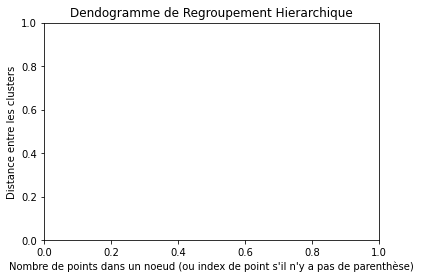

In [10]:
# Formatage des empreintes
listOfFingerprints=[]
listWithAllTaggedFingerprints=[]
# Attention remplacer liste_Arguments par sys.argv si en dehors de Jupiter
liste_Arguments=["blabla","GlobeImposter","legitimeFirefox","legitimeSafari"]
for z in range(len(liste_Arguments)-1):
    filePath = liste_Arguments[z+1]
    with open(filePath, "r") as file:
        listOfFingerprintsInFile = [line.replace('\n', '') for line in file]
        #listOfFingerprints.append(line.replace('\n','')) #retire le retour a la ligne a la fin des fingerprints
        listOfFingerprintsInFile=list(set(listOfFingerprintsInFile)) # retire les doublons
        listOfFingerprintsInFile2=[]
        for y in range(len(listOfFingerprintsInFile)):
            listOfFingerprintsInFile2.append([listOfFingerprintsInFile[y],filePath])
    listOfFingerprints.extend(listOfFingerprintsInFile)
    listWithAllTaggedFingerprints.extend(listOfFingerprintsInFile2)


# Création de la matrice de distances
listDistances=[] # Chaque liste contient l'ensemble des distances par rapport a une empreinte.
for fingerprint in listOfFingerprints:
    listOfDist=[]
    for fingerprint2 in listOfFingerprints:
        listOfDist.append(distance(fingerprint,fingerprint2))                    
    listDistances.append(listOfDist)


# Création du modèle
model = AgglomerativeClustering(distance_threshold=None, n_clusters=3) # n_cluster= number of cluster to find, if not none distance must be none. 
model = model.fit(listDistances) 


# Affichage
plt.title("Dendogramme de Regroupement Hierarchique")
#plot_dendrogram(model, truncate_mode="level", p=10) # plot the top ten levels of the dendrogram
plt.xlabel("Nombre de points dans un noeud (ou index de point s'il n'y a pas de parenthèse)")
plt.ylabel("Distance entre les clusters")
#plt.show()
#print(model.n_clusters_)
#print(model.labels_)
for k in range(model.n_clusters_):
    print("\ncluster number "+str(k))
    for p in range(len(listOfFingerprints)):
        if model.labels_[p]==k:
            print(listOfFingerprints[p]+' '+listWithAllTaggedFingerprints[p][1])